# 05 Assignment

New method in Python: groupby

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb 

df = pd.read_csv('05 data.csv')
df.head()
#df[df['Sample Number']==8].head()

,Sample Number,Thickness,Unnamed: 2,Batch,Concentration
0,1,0.0629,NaN,1.0,96.4
1,1,0.0636,NaN,1.0,97.3
2,1,0.0640,NaN,1.0,94.1
3,2,0.0630,NaN,1.0,95.2
4,2,0.0631,NaN,1.0,96.3


## Groupby with mean, max, min ,.......
A pandas tool to select a group of data that shares same value for particular column and do a mathmatical operation on them

# Q1 & Q2

# Build R chart
Some Useful Notes
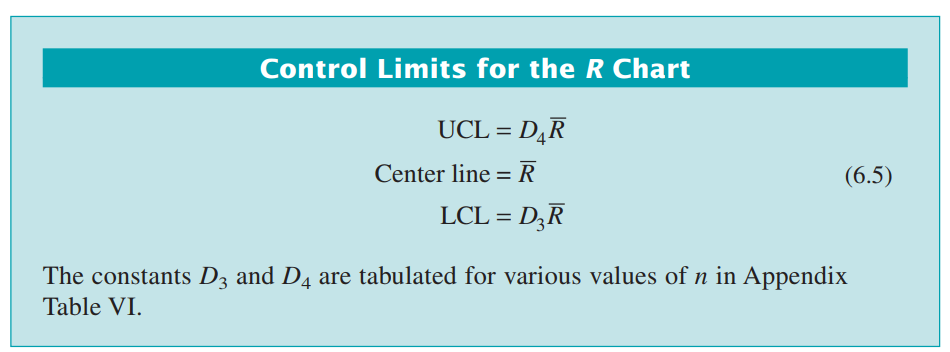

In [120]:
def AppendixVI(n,factor=['A','n','A','A2','A3','c4','1/c4','B3','B4','B5','B6','d2','1/d2','d3','D1','D2','D3','D4'][-4]):
    '''
    Just an alternative for looking up the table
    n: sample size
    factor: factor to be checked at n 
    '''
    AppendixVI=pd.read_csv('AppendixVI.csv',index_col='n')
    return AppendixVI[factor][n]

In [121]:
df.head()

,Sample Number,Thickness,Unnamed: 2,Batch,Concentration
0,1,0.0629,NaN,1.0,96.4
1,1,0.0636,NaN,1.0,97.3
2,1,0.0640,NaN,1.0,94.1
3,2,0.0630,NaN,1.0,95.2
4,2,0.0631,NaN,1.0,96.3


In [122]:
X_bar=df.groupby(['Sample Number']).mean()
X_bar.head()

,Thickness,Unnamed: 2,Batch,Concentration
Sample Number,,,,
1,0.063500,NaN,1.0,95.933333
2,0.062767,NaN,1.0,95.533333
3,0.063067,NaN,2.0,95.466667
4,0.063167,NaN,2.0,95.466667
5,0.062567,NaN,3.0,97.233333


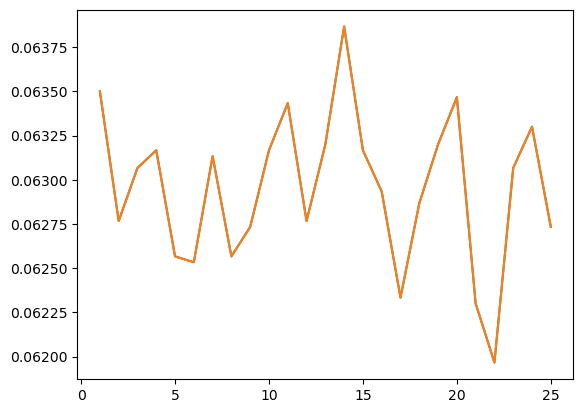

In [125]:
plt.plot(X_bar.index,X_bar['Thickness'])
plt.show()

In [5]:
X_bar=df.groupby(['Sample Number']).mean() #Each sample Mean
X_R=df.groupby(['Sample Number']).max()-df.groupby(['Sample Number']).min() #Each sample Range
X_bar=X_bar['Thickness']
X_R=X_R['Thickness']
m=len(X_R) #number of samples
n=len(df[df['Sample Number']==1]) #sample size, we are assuming all samples have the same size

CL_R=X_R.mean()
D3=AppendixVI(n=n,factor='D3')
D4=AppendixVI(n=n,factor='D4')
R_UCL=D4*CL_R
R_LCL=D3*CL_R
print(f'The number of samples is {m}')
print(f'Samples size is {n}')      
print(f'The centeral limit for the R chart is {CL_R}')
print(f'The upper limit for the R chart is {R_UCL}')
print(f'The upper limit for the R chart is {R_LCL}')
#print(X_R)

The number of samples is 25
Samples size is 3
The centeral limit for the R chart is 0.0009199999999999997
The upper limit for the R chart is 0.002368079999999999
The upper limit for the R chart is 0.0


# Refine Step

In [6]:
X_R_refined1=X_R[(X_R>=R_LCL) & (X_R<=R_UCL)]
m=len(X_R_refined1[X_R_refined1.notna()]) #number of samples check this to know if any samples was dropped
#Note that unlike minitab we do not drop the samples out of the bound but we replace them with nan
#Note also how python deals with nan values when taking the mean: np.mean([8,2,nan]) vs pd.DataFrame([8,2,np.nan]).mean()
CL_R_refined1=X_R_refined1.mean()
D3=AppendixVI(n=n,factor='D3')
D4=AppendixVI(n=n,factor='D4')
R_UCL_refined1=D4*CL_R_refined1
R_LCL_refined1=D3*CL_R_refined1
print(f'The number of samples is {m}')
print(f'Samples size is {n}')  
print(f'The corrected centeral limit for the R chart is {CL_R_refined1}')
print(f'The corrected upper limit for the R chart is {R_UCL_refined1}')
print(f'The corrected upper limit for the R chart is {R_LCL_refined1}')

The number of samples is 24
Samples size is 3
The corrected centeral limit for the R chart is 0.0008541666666666663
The corrected upper limit for the R chart is 0.0021986249999999988
The corrected upper limit for the R chart is 0.0


# Plot the R chart Before Refining

The new methods used here are not necessary but they're easy

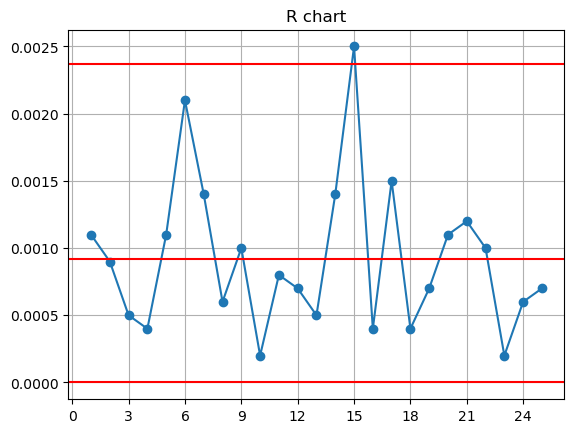

In [7]:
ax = plt.figure().gca()
ax.plot(X_R.index,X_R,marker="o")
ax.axhline(y = R_UCL, color = 'r', linestyle = '-')
ax.axhline(y = R_LCL, color = 'r', linestyle = '-')
ax.axhline(y = CL_R, color = 'r', linestyle = '-')
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.title('R chart')
plt.show()

# Plot the R chart After Refining

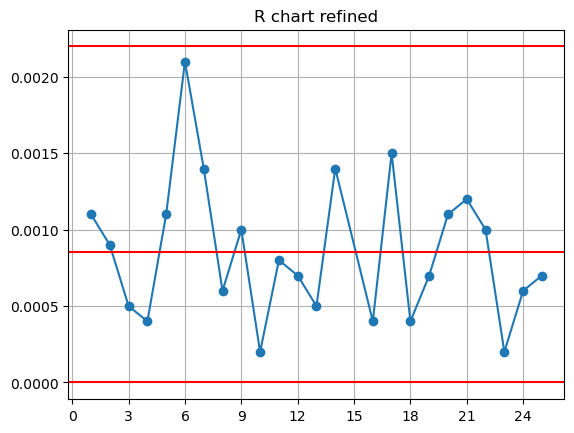

In [8]:
ax = plt.figure().gca()
ax.plot(X_R_refined1.index,X_R_refined1,marker="o")
ax.axhline(y = R_UCL_refined1, color = 'r', linestyle = '-')
ax.axhline(y = R_LCL_refined1, color = 'r', linestyle = '-')
ax.axhline(y = CL_R_refined1, color = 'r', linestyle = '-')
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.title('R chart refined')
plt.show()

## Q3

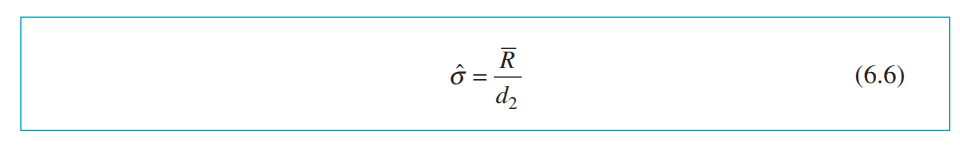

In [9]:
d2=AppendixVI(n=n,factor='d2')
print(f'Estimated Sigma is {CL_R_refined1/d2}')

Estimated Sigma is 0.0005045284504823781


# Q4 Xbar chart
After gettiing the R chart, the xbar is very striaght forward. 
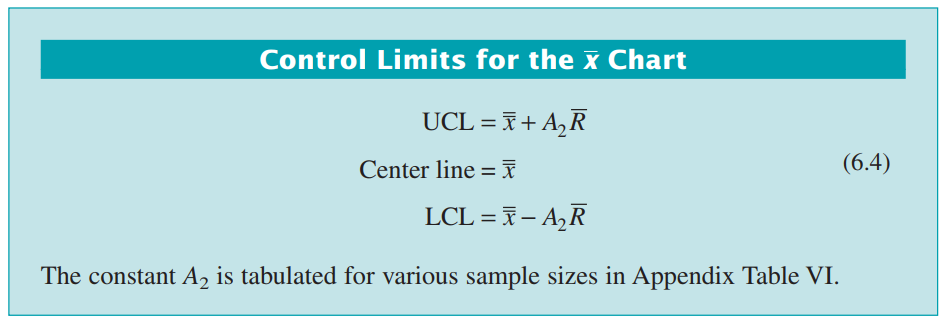
x_bar_bar is just mu_x_bar

In [10]:
X_bar_refined1=X_bar[(X_R>=R_LCL) & (X_R<=R_UCL)]
m=len(X_bar_refined1[X_bar_refined1.notna()]) #number of samples check this to know if any samples was dropped
#Note that unlike minitab we do not drop the samples out of the bound but we replace them with nan
#Note also how python deals with nan values when taking the mean: np.mean([8,2,nan]) vs pd.DataFrame([8,2,np.nan]).mean()
CL_Xbar_refined1=X_bar_refined1.mean() #Xbar_bar
A2=AppendixVI(n=n,factor='A2')

Xbar_UCL_refined1=CL_Xbar_refined1+A2*CL_R_refined1 #Using Rbar(CL_R) from the Rchart
Xbar_LCL_refined1=CL_Xbar_refined1-A2*CL_R_refined1 #Using Rbar(CL_R) from the Rchart
print(f'The number of samples is {m}')
print(f'Samples size is {n}')  
print(f'The corrected centeral limit for the Xbar chart is {CL_Xbar_refined1}')
print(f'The corrected upper limit for the Xbar chart is {Xbar_UCL_refined1}')
print(f'The corrected upper limit for the Xbar chart is {Xbar_LCL_refined1}')

The number of samples is 24
Samples size is 3
The corrected centeral limit for the Xbar chart is 0.06294305555555556
The corrected upper limit for the Xbar chart is 0.06381686805555556
The corrected upper limit for the Xbar chart is 0.062069243055555556


In [9]:
X_bar_refined2=X_bar_refined1[(X_bar_refined1>=Xbar_LCL_refined1) & (X_bar_refined1<=Xbar_UCL_refined1)]
m=len(X_bar_refined2[X_bar_refined2.notna()]) #number of samples check this to know if any samples was dropped
print(m) #if m has not changed then the next part is not necessairly

#Note that unlike minitab we do not drop the samples out of the bound but we replace them with nan
#Note also how python deals with nan values when taking the mean: np.mean([8,2,nan]) vs pd.DataFrame([8,2,np.nan]).mean()
CL_Xbar_refined2=X_bar_refined2.mean() #Xbar_bar
A2=AppendixVI(n=n,factor='A2')

Xbar_UCL_refined2=CL_Xbar_refined2+A2*CL_R_refined1 #Using Rbar(CL_R) from the Rchart
Xbar_LCL_refined2=CL_Xbar_refined2-A2*CL_R_refined1 #Using Rbar(CL_R) from the Rchart
print(f'The number of samples is {m}')
print(f'Samples size is {n}')  
print(f'The corrected centeral limit for the Xbar chart is {CL_Xbar_refined2}')
print(f'The corrected upper limit for the Xbar chart is {Xbar_UCL_refined2}')
print(f'The corrected upper limit for the Xbar chart is {Xbar_LCL_refined2}')

22
The number of samples is 22
Samples size is 3
The corrected centeral limit for the Xbar chart is 0.06294545454545454
The corrected upper limit for the Xbar chart is 0.06381926704545454
The corrected upper limit for the Xbar chart is 0.06207164204545454


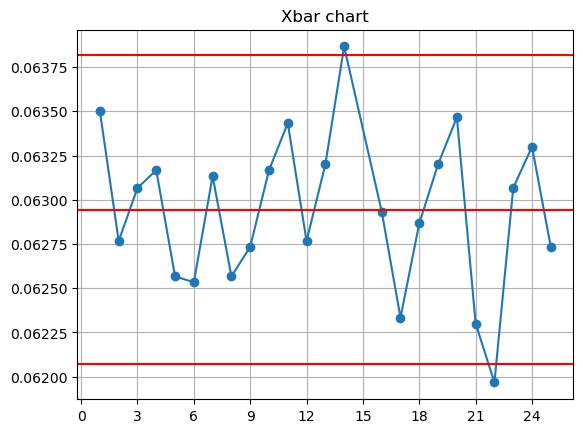

In [10]:
ax = plt.figure().gca()
ax.plot(X_bar_refined1.index,X_bar_refined1,marker="o")
ax.axhline(y = Xbar_UCL_refined1, color = 'r', linestyle = '-')
ax.axhline(y = Xbar_LCL_refined1, color = 'r', linestyle = '-')
ax.axhline(y = CL_Xbar_refined1, color = 'r', linestyle = '-')
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.title('Xbar chart')
plt.show()

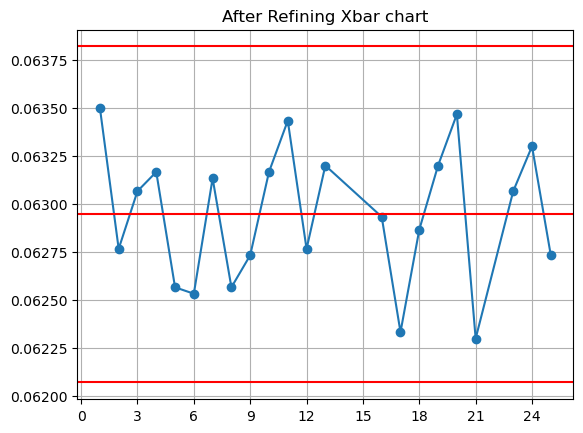

In [11]:
ax = plt.figure().gca()
ax.plot(X_bar_refined2.index,X_bar_refined2,marker="o")
ax.axhline(y = Xbar_UCL_refined2, color = 'r', linestyle = '-')
ax.axhline(y = Xbar_LCL_refined2, color = 'r', linestyle = '-')
ax.axhline(y = CL_Xbar_refined2, color = 'r', linestyle = '-')
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.title('After Refining Xbar chart')
plt.show()

# Q5 to Q6 X-S chart with fixed sample size
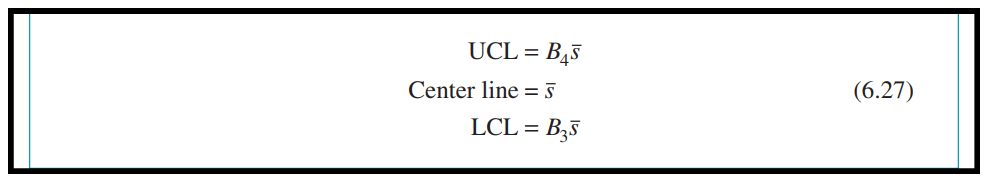
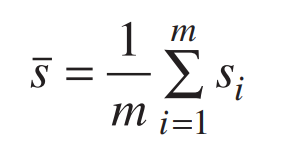


In [12]:
X_bar=df.groupby(['Sample Number']).mean() #Each sample Mean
X_Si=df.groupby(['Sample Number']).std()
X_bar=X_bar['Thickness']
X_Si=X_Si['Thickness']
m=len(X_Si) #number of samples
n=len(df[df['Sample Number']==1]) #sample size, we are assuming all samples have the same size

CL_S=X_Si.mean()
B4=AppendixVI(n=n,factor='B4')
B3=AppendixVI(n=n,factor='B3')
S_UCL=B4*CL_S
S_LCL=B3*CL_S
print(f'The number of samples is {m}')
print(f'Samples size is {n}')      
print(f'The centeral limit for the R chart is {CL_S}')
print(f'The upper limit for the R chart is {S_UCL}')
print(f'The upper limit for the R chart is {S_LCL}')
#print(X_R)

The number of samples is 25
Samples size is 3
The centeral limit for the R chart is 0.0004781711498741441
The upper limit for the R chart is 0.001227943512876802
The upper limit for the R chart is 0.0


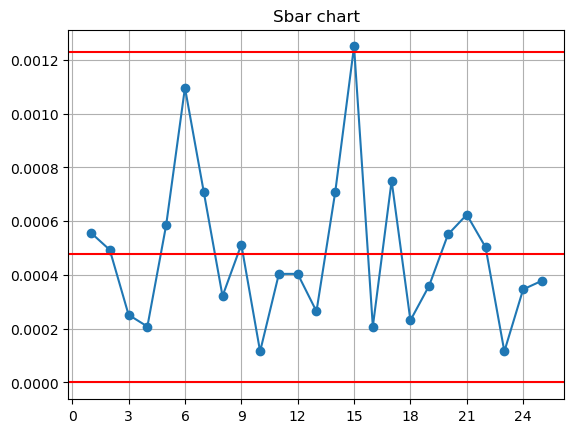

In [13]:
ax = plt.figure().gca()
ax.plot(X_Si.index,X_Si,marker="o")
ax.axhline(y = S_UCL, color = 'r', linestyle = '-')
ax.axhline(y = S_LCL, color = 'r', linestyle = '-')
ax.axhline(y = CL_S, color = 'r', linestyle = '-')
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.title('Sbar chart')
plt.show()

In [15]:
X_Si_refined1=X_Si[(X_Si>=S_LCL) & (X_Si<=S_UCL)]
print(len(X_Si_refined1))
m=len(X_Si_refined1[X_Si_refined1.notna()]) #number of samples check this to know if any samples was dropped
#Note that unlike minitab we do not drop the samples out of the bound but we replace them with nan
#Note also how python deals with nan values when taking the mean: np.mean([8,2,nan]) vs pd.DataFrame([8,2,np.nan]).mean()
CL_S_refined1=X_Si_refined1.mean()
B4=AppendixVI(n=n,factor='B4')
B3=AppendixVI(n=n,factor='B3')
S_UCL_refined1=B4*CL_S_refined1
S_LCL_refined1=B3*CL_S_refined1

print(f'The number of samples is {m}')
print(f'Samples size is {n}')  
print(f'The corrected centeral limit for the S chart is {CL_S_refined1}')
print(f'The corrected upper limit for the S chart is {S_UCL_refined1}')
print(f'The corrected upper limit for the S chart is {S_LCL_refined1}')

24
The number of samples is 24
Samples size is 3
The corrected centeral limit for the S chart is 0.0004459977274147027
The corrected upper limit for the S chart is 0.0011453221640009565
The corrected upper limit for the S chart is 0.0


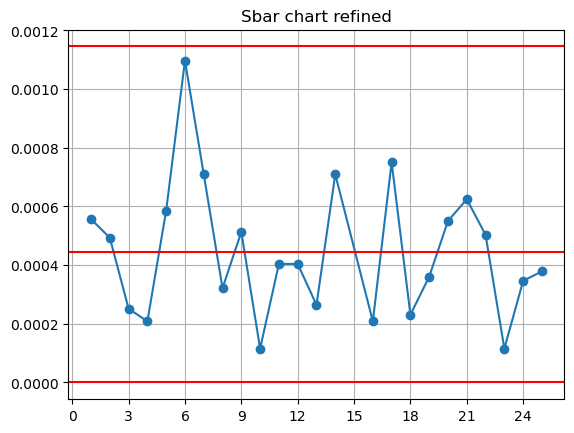

In [16]:
ax = plt.figure().gca()
ax.plot(X_Si_refined1.index,X_Si_refined1,marker="o")
ax.axhline(y = S_UCL_refined1, color = 'r', linestyle = '-')
ax.axhline(y = S_LCL_refined1, color = 'r', linestyle = '-')
ax.axhline(y = CL_S_refined1, color = 'r', linestyle = '-')
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.title('Sbar chart refined')
plt.show()

# Q7
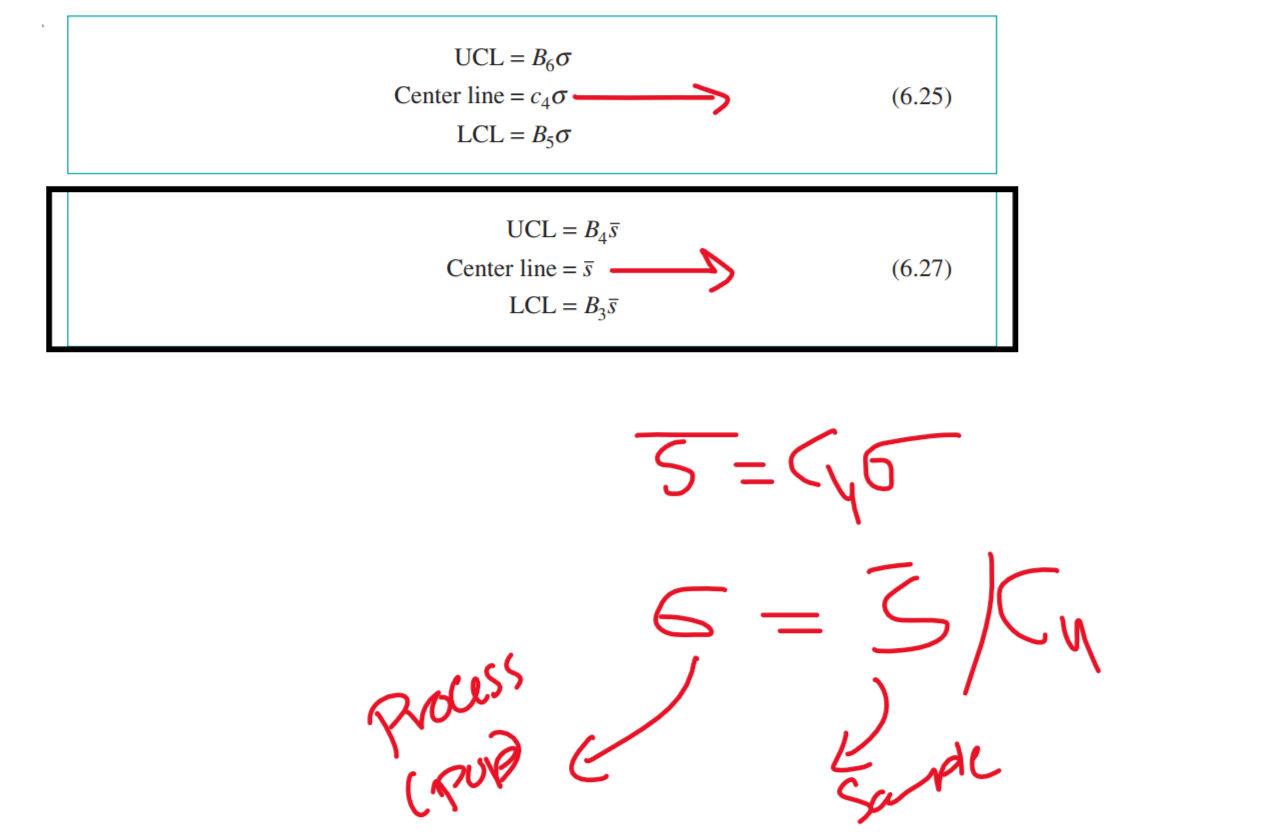

In [17]:
c4=AppendixVI(n=n,factor='c4')
sigma_process=CL_S_refined1/c4
print(f'Process Sigma is equal to {sigma_process}')

Process Sigma is equal to 0.0005032698345911788


# Q8 Xbar and S for fixed sample size
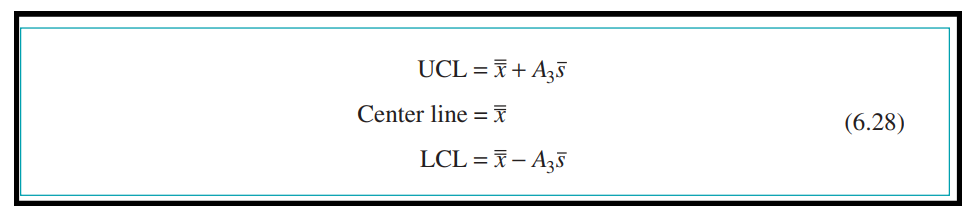

In [20]:
X_bar_refined1=X_bar
print(len(X_bar))
m=len(X_bar_refined1[X_bar_refined1.notna()]) #number of samples check this to know if any samples was dropped
#Note that unlike minitab we do not drop the samples out of the bound but we replace them with nan
#Note also how python deals with nan values when taking the mean: np.mean([8,2,nan]) vs pd.DataFrame([8,2,np.nan]).mean()
CL_Xbar_refined1=X_bar_refined1.mean() #Xbar_bar
A3=AppendixVI(n=n,factor='A3')

Xbar_UCL_refined1=CL_Xbar_refined1+A3*CL_S_refined1 #Using Rbar(CL_R) from the Rchart
Xbar_LCL_refined1=CL_Xbar_refined1-A3*CL_S_refined1 #Using Rbar(CL_R) from the Rchart
print(f'The number of samples is {m}')
print(f'Samples size is {n}')  
print(f'The corrected centeral limit for the Xbar chart is {CL_Xbar_refined1}')
print(f'The corrected upper limit for the Xbar chart is {Xbar_UCL_refined1}')
print(f'The corrected upper limit for the Xbar chart is {Xbar_LCL_refined1}')

25
The number of samples is 25
Samples size is 3
The corrected centeral limit for the Xbar chart is 0.062952
The corrected upper limit for the Xbar chart is 0.06382347955936832
The corrected upper limit for the Xbar chart is 0.06208052044063166


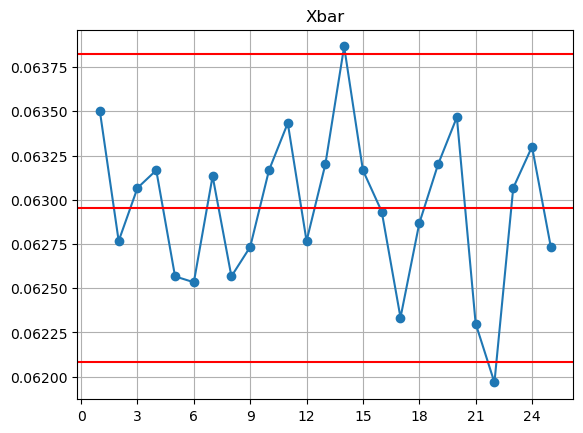

In [21]:
plt.figure()
plt.plot(X_bar_refined1.index,X_bar_refined1,marker="o")
plt.axhline(y = Xbar_UCL_refined1, color = 'r', linestyle = '-')
plt.axhline(y = Xbar_LCL_refined1, color = 'r', linestyle = '-')
plt.axhline(y = CL_Xbar_refined1, color = 'r', linestyle = '-')
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.title('Xbar')
plt.show()

In [27]:
X_bar_refined2=X_bar_refined1[(X_bar_refined1>=Xbar_LCL_refined1) & (X_bar_refined1<=Xbar_UCL_refined1)]
m=len(X_bar_refined2[X_bar_refined2.notna()]) #number of samples check this to know if any samples was dropped
print(m) #if m has not changed then the next part is not necessairly

#Note that unlike minitab we do not drop the samples out of the bound but we replace them with nan
#Note also how python deals with nan values when taking the mean: np.mean([8,2,nan]) vs pd.DataFrame([8,2,np.nan]).mean()
CL_Xbar_refined2=X_bar_refined2.mean() #Xbar_bar
A3=AppendixVI(n=n,factor='A3')
print(CL_S_refined1)
print(A3)
Xbar_UCL_refined2=CL_Xbar_refined2+A3*CL_S_refined1 #Using Rbar(CL_R) from the Rchart
Xbar_LCL_refined2=CL_Xbar_refined2-A3*CL_S_refined1 #Using Rbar(CL_R) from the Rchart
print(f'The number of samples is {m}')
print(f'Samples size is {n}')  
print(f'The corrected centeral limit for the Xbar chart is {CL_Xbar_refined2}')
print(f'The corrected upper limit for the Xbar chart is {Xbar_UCL_refined2}')
print(f'The corrected lower limit for the Xbar chart is {Xbar_LCL_refined2}')

23
0.0004459977274147027
1.954
The number of samples is 23
Samples size is 3
The corrected centeral limit for the Xbar chart is 0.06295507246376811
The corrected upper limit for the Xbar chart is 0.06382655202313643
The corrected lower limit for the Xbar chart is 0.06208359290439978


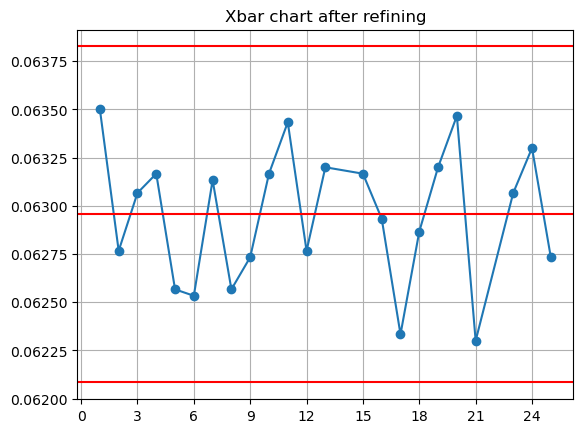

In [28]:
ax = plt.figure().gca()
ax.plot(X_bar_refined2.index,X_bar_refined2,marker="o")
ax.axhline(y = Xbar_UCL_refined2, color = 'r', linestyle = '-')
ax.axhline(y = Xbar_LCL_refined2, color = 'r', linestyle = '-')
ax.axhline(y = CL_Xbar_refined2, color = 'r', linestyle = '-')
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.title('Xbar chart after refining')
plt.show()

# Q9 Xbar and S for varying sample size
Some Useful Notes
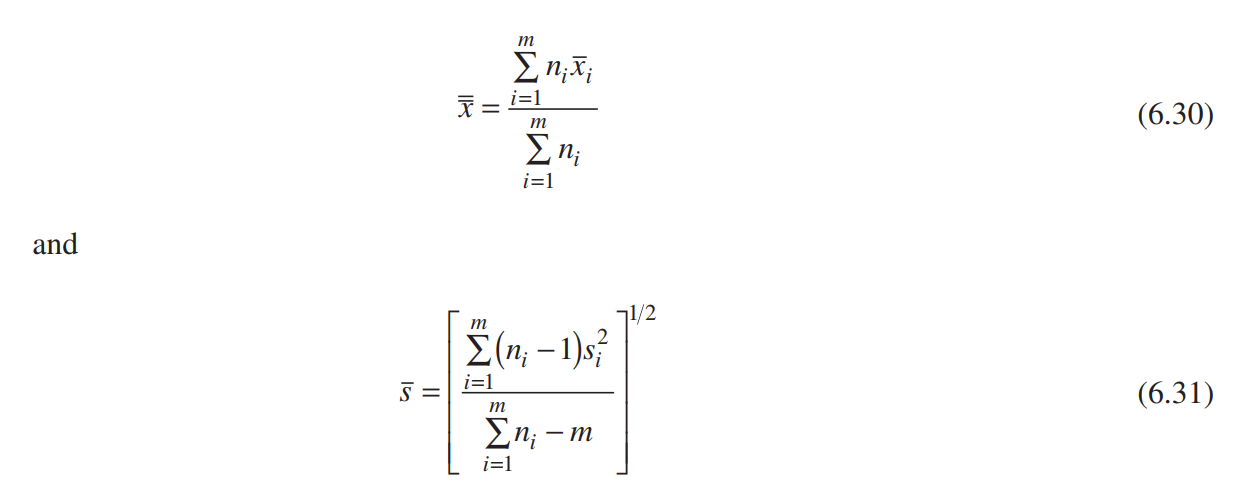
Useful Example
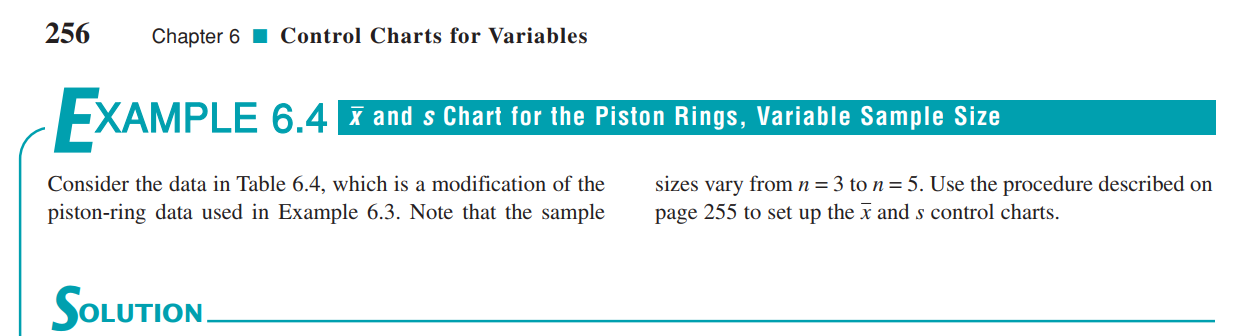


In [99]:
df = pd.read_csv('05 data.csv')
df=df[['Batch','Concentration']]
xi_bar=df.groupby(['Batch']).mean()
ni=df.groupby(['Batch']).count()


nidotx_bar=(xi_bar*ni).sum()
sum_ni=ni.sum()
x_bar=nidotx_bar/sum_ni
print(x_bar)


si=df.groupby(['Batch']).var()
num=((ni-1)*si).sum()
den=ni.sum()-len(ni)
s_bar=np.sqrt(num/den)
print(s_bar)

Concentration    96.529231
dtype: float64
       Concentration
Batch               
1.0                6
2.0                6
3.0                4
4.0                5
5.0                6
6.0                4
7.0                8
8.0                4
9.0                6
10.0               5
11.0               6
12.0               5
Concentration    1.271496
dtype: float64


In [92]:
AppendixVI(8,'B3')

0.185

In [100]:
print(np.max(ni),np.min(ni))
B3=ni*0/0
print(B3)

B3[ni==4]=0.0
print(ni)
print(B3)
B3[ni==5]=0.0
B3[ni==6]=0.03
B3[ni==7]=0.118
B3[ni==8]=0.185

B3

Concentration    8
dtype: int64 Concentration    4
dtype: int64
       Concentration
Batch               
1.0              NaN
2.0              NaN
3.0              NaN
4.0              NaN
5.0              NaN
6.0              NaN
7.0              NaN
8.0              NaN
9.0              NaN
10.0             NaN
11.0             NaN
12.0             NaN
       Concentration
Batch               
1.0                6
2.0                6
3.0                4
4.0                5
5.0                6
6.0                4
7.0                8
8.0                4
9.0                6
10.0               5
11.0               6
12.0               5
       Concentration
Batch               
1.0              NaN
2.0              NaN
3.0              0.0
4.0              NaN
5.0              NaN
6.0              0.0
7.0              NaN
8.0              0.0
9.0              NaN
10.0             NaN
11.0             NaN
12.0             NaN


,Concentration
Batch,
1.0,0.030
2.0,0.030
3.0,0.000
4.0,0.000
5.0,0.030
6.0,0.000
7.0,0.185
8.0,0.000
9.0,0.030


In [ ]:
df['Concentration'].iloc[0]

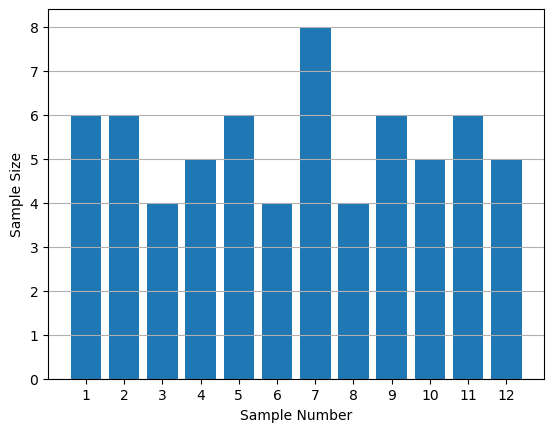

The correct S_bar_bar is 1.271495677484447, the wrong S_bar_bar is 1.5971011904761887
1.271495677484447
Batch
1.0     1.970
2.0     1.970
3.0     2.266
4.0     2.089
5.0     1.970
6.0     2.266
7.0     1.815
8.0     2.266
9.0     1.970
10.0    2.089
11.0    1.970
12.0    2.089
Name: Batch_Size, dtype: float64


In [112]:


df['Batch_Size']=df['Batch']/df['Batch'] #Just adding coloum of ones
Sample_Size=df.groupby(['Batch']).sum()['Batch_Size'] #number of observation per each sample (n)
Number_of_Samples=len(Sample_Size) # (m)
Sample_Number=df.groupby(['Batch']).sum().index
ax = plt.figure().gca()
ax.bar(Sample_Number,Sample_Size)
ax.set_xticks(Sample_Number)
ax.set_xlabel('Sample Number')
ax.set_ylabel('Sample Size')
ax.yaxis.grid()
plt.show()

Sample_var=df.groupby(['Batch']).var()['Concentration'] #(si^2_bar)
s_bar=np.sqrt(np.sum((Sample_Size-1)*Sample_var)/(np.sum(Sample_Size)-Number_of_Samples))
print(f'The correct S_bar_bar is {s_bar}, the wrong S_bar_bar is {np.mean(Sample_var)}')
CL_sbar=s_bar
print(CL_sbar)
B3=Sample_Size.apply(AppendixVI, args=('B3',))
B4=Sample_Size.apply(AppendixVI, args=('B4',))

print(B4)
sbar_UCL=s_bar*B4
sbar_LCL=s_bar*B3





In [107]:
df.head()
df['New_Col']=np.nan
df.head()

,Batch,Concentration,New_Col
0,1.0,96.4,NaN
1,1.0,97.3,NaN
2,1.0,94.1,NaN
3,1.0,95.2,NaN
4,1.0,96.3,NaN


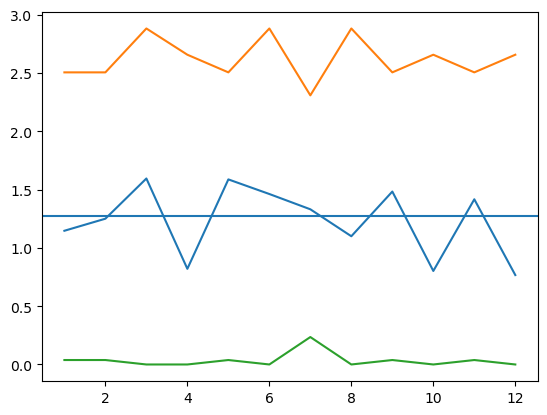

In [118]:
plt.figure()
plt.plot(Sample_Number,np.sqrt(Sample_var))
plt.plot(Sample_Number,sbar_UCL)
plt.plot(Sample_Number,sbar_LCL)
plt.axhline(y = CL_sbar)
plt.show()


In [129]:
for counter in np.arange(4,9):
    print(counter)
    print(AppendixVI(counter,'A3'))

4
1.628
5
1.427
6
1.287
7
1.182
8
1.099


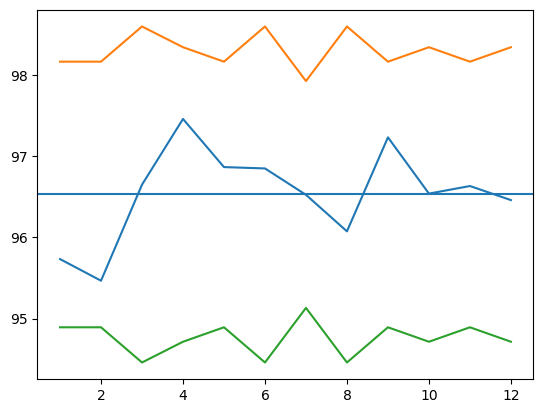

In [143]:
df = pd.read_csv('05 data.csv')
df=df[['Batch','Concentration']]
xi_bar=df.groupby(['Batch']).mean()
ni=df.groupby(['Batch']).count()
nidotx_bar=(xi_bar*ni).sum()
sum_ni=ni.sum()
x_bar=nidotx_bar/sum_ni




A3=ni*0/0
#print(A3)
A3[ni==4]=1.628
A3[ni==5]=1.427
A3[ni==6]=1.287
A3[ni==7]=1.182
A3[ni==8]=1.099
#print(A3)
CL=x_bar.item()
UCL=x_bar+A3*CL_sbar
LCL=x_bar-A3*CL_sbar

plt.figure()
plt.plot(xi_bar.index,xi_bar)
plt.plot(xi_bar.index,UCL)
plt.plot(xi_bar.index,LCL)
plt.axhline(y = CL)
plt.show()

In [154]:
xi_bar_revise=xi_bar[(xi_bar>LCL)&(xi_bar<UCL)].dropna()
ni_revise=ni[(xi_bar>LCL)&(xi_bar<UCL)].dropna()
m=len(ni_revise)
A3_revised=A3[(xi_bar>LCL)&(xi_bar<UCL)].dropna()
nidotx_bar=(xi_bar_revise*ni_revise).sum()

sum_ni=ni_revise.sum()
x_bar=nidotx_bar/sum_ni


In [109]:
Sample_var_revised=Sample_var[(Sample_var<=sbar_UCL)&(Sample_var>=sbar_LCL)]
Sample_Sizer_revised=Sample_Sizer[(Sample_var<=sbar_UCL)&(Sample_var>=sbar_LCL)]
s_bar=np.sqrt(np.sum((Sample_Size-1)*Sample_var)/(np.sum(Sample_Size)-Sample_var_revised))
print(f'The correct S_bar_bar is {s_bar}, the wrong S_bar_bar is {np.mean(Sample_var)}')
CL_sbar=s_bar

B3=Sample_Size.apply(AppendixVI, args=('B3',))
B4=Sample_Size.apply(AppendixVI, args=('B4',))

sbar_UCL=s_bar*B4
sbar_LCL=s_bar*B3

In [23]:
Sample_Mean=df.groupby(['Batch']).mean()['Concentration'] #(xi_bar)
x_bar_bar=np.sum(Sample_Size*Sample_Mean)/np.sum(Sample_Size)
print(f'The correct X_bar_bar is {x_bar_bar}, the wrong X_bar_bar is {np.mean(Sample_Mean)}')

CL_xbar=x_bar_bar

A3=Sample_Size.apply(AppendixVI, args=('A3',))
xbar_UCL=CL_xbar+s_bar*A3
xbar_LCL=CL_xbar-s_bar*A3

The correct X_bar_bar is 96.52923076923076, the wrong X_bar_bar is 96.5411111111111


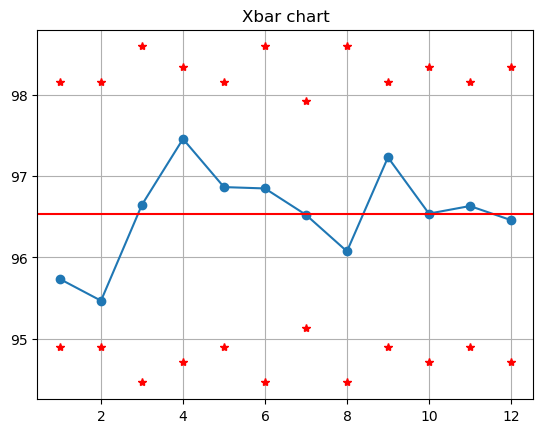

In [24]:
ax = plt.figure().gca()
ax.plot(Sample_Number,Sample_Mean,marker="o")
ax.plot(Sample_Number,xbar_UCL,marker="*", color = 'r',linestyle = ' ')
ax.plot(Sample_Number,xbar_LCL,marker="*", color = 'r',linestyle = ' ')
ax.axhline(y = CL_xbar, color = 'r', linestyle = '-')
#plt.legend(['Sample Variance','UCL','LCL','CL'], fontsize=7,loc='lower left',ncol=2)
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.title('Xbar chart')
plt.show()